#### Integrin

## setup

In [1]:
import os
import sys
import math
import time
import pickle
import copy
#import mdtraj
import MDAnalysis as mda
#import pyemma
#import pyemma.util.contexts
import networkx as nx
import random
#import parmed as pmd
#import acpype
import pandas as pd
from MDAnalysis.analysis import distances


import numpy as np
from scipy.linalg import eigh
from scipy.spatial.distance import pdist
from scipy.interpolate import interp1d
import matplotlib as mpl
from matplotlib import ticker
if os.environ.get('DISPLAY','') == '':
    print('no display found. Using non-interactive Agg backend')
    mpl.use('Agg')
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


no display found. Using non-interactive Agg backend


In [2]:

from importlib import reload 
import sys


#### plot settings

In [3]:
showPlots=1
useMagics=1
if useMagics:
    %matplotlib inline
    #%matplotlib notebook
    %load_ext autoreload
    %autoreload 2
    %reload_ext autoreload
    
font = {'weight' : 'normal',
        'size'   : 25}

plt.rc('font', **font)

In [4]:
# Read saved data


with open(r"../../../../integrin_dmap_gan_notebooks/MS_final_notebooks/switchblade_deadbolt_gan_data_psi_distances.pkl", "rb") as input_file:
    psi_traj_gan = pickle.load(input_file)
    
psi_relevant_space = np.vstack((psi_traj_gan['psi_2'], psi_traj_gan['psi_3'], psi_traj_gan['psi_4'], psi_traj_gan['psi_5'] )).T
cog_tail_helices_cg_wgan = psi_traj_gan['tailh_dist']*10
cog_beta_prop_beta_td_cg_wgan = psi_traj_gan['betap_dist']*10
cog_chains_cg_wgan = psi_traj_gan['chain_dist']*10
cog_headtail_cg_wgan = psi_traj_gan['headtail_dist']*10

with open(r"../../../../integrin_dmap_gan_notebooks/MS_final_notebooks/switchblade_deadbolt_gan_data_traj.pkl", "rb") as input_file:
    gen_traj_transition_points = pickle.load(input_file)['gen_traj_transition_points']
    
with open(r"../../../../integrin_dmap_gan_notebooks/MS_final_notebooks/switchblade_deadbolt_gan_data_psi_distances_real.pkl", "rb") as input_file:
    psi_traj = pickle.load(input_file)

real_cog_tail_helices_cg_wgan = psi_traj['tailh_dist']*10
real_cog_beta_prop_beta_td_cg_wgan = psi_traj['betap_dist']*10
real_cog_chains_cg_wgan = psi_traj['chain_dist']*10
real_cog_headtail_cg_wgan = psi_traj['headtail_dist']*10
    
with open(r"../../../../integrin_dmap_gan_notebooks/MS_final_notebooks/switchblade_deadbolt_gan_data_traj_real.pkl", "rb") as input_file:
    gen_traj_transition_points_real = pickle.load(input_file)['gen_traj_transition_points_real']
    
   


### Nfake

In [5]:
nfake = real_cog_tail_helices_cg_wgan.shape[0]-2450*4
nfake

90000

In [93]:


# def generate_points_with_distance(point1, point2, distance,include_first=True):
#     x1, y1 = point1
#     x2, y2 = point2
    
#     print(point1, point2)
    
#     xdiff, ydiff = (x2-x1), (y2-y1)
#     distance_points = np.sqrt(xdiff**2+ydiff**2)
#     print(distance_points)
#     unit_vector = (xdiff/distance_points, ydiff/distance_points)
#     print(unit_vector)
    
#     if include_first:
#         equidistant_points = [point1]
#     else:
#         equidistant_points = []
#     current_point = point1
#     ndistance = 0
#     while ndistance <distance_points:
        
#         current_point = (current_point[0] + unit_vector[0]*distance,
#                          current_point[1] + unit_vector[1]*distance)
        
#         #print(current_point)
        
#         ndistance+=distance
        
#         equidistant_points.append(current_point)

    
#     return equidistant_points


def find_closest_index(tuple_data, target_point):
    closest_index = None
    closest_distance = float('inf')
    
    for i, element in enumerate(tuple_data):
        distance = math.dist(element, target_point)
        if distance < closest_distance:
            closest_distance = distance
            closest_index = i
    
    return closest_index



# # bent to intermediate
# p0 = (real_cog_tail_helices_cg_wgan[30094]/10, real_cog_beta_prop_beta_td_cg_wgan[30094]/10)
# p1 = (real_cog_tail_helices_cg_wgan[92595]/10, real_cog_beta_prop_beta_td_cg_wgan[92595]/10)
# p2 = (real_cog_tail_helices_cg_wgan[4417]/10, real_cog_beta_prop_beta_td_cg_wgan[4417]/10)
# p3 = (real_cog_tail_helices_cg_wgan[23980]/10, real_cog_beta_prop_beta_td_cg_wgan[23980]/10)

# beta_int_points = generate_points_with_distance(p0, p1, .75, include_first=True)[:-1]
# int1_int2_points =  generate_points_with_distance(beta_int_points[-1], p2, .75, include_first=True)[1:-1]
# int2_open_points =  generate_points_with_distance(int1_int2_points[-1], p3, .75, include_first=True)[1:]


# tuple_data = tuple(zip(real_cog_tail_helices_cg_wgan/10, real_cog_beta_prop_beta_td_cg_wgan/10))

# # Points are first generated on a polynomial using 4 user defined inputs.
# # Closest x-axis and y-axis points in the data are then found and used for generating the images.

# beta_int_indices = [find_closest_index(tuple_data, beta_int_points[i]) for i in range(len(beta_int_points))]
# int1_int2_indices = [find_closest_index(tuple_data, int1_int2_points[i]) for i in range(len(int1_int2_points))]
# int2_open_indices = [find_closest_index(tuple_data, int2_open_points[i]) for i in range(len(int2_open_points))]

# #all_indices = np.concatenate((switch_indices,beta_indices,mid_indices))

# all_indices = np.concatenate((beta_int_indices,int1_int2_indices,int2_open_indices))


In [94]:
tuple_data = tuple(zip(real_cog_tail_helices_cg_wgan/10, real_cog_beta_prop_beta_td_cg_wgan/10))

## LOAD FINAL STRING

In [95]:
# load iter 1 images
NITERATIONS=250
project2path='/project2/andrewferguson/sivadasetty/doe/analysis-integrin/string_mechanisms/deadbolt/string_parallel_100k_full_lipid_case/'
file_name = project2path+'/analysis_string/images/reparameterized_images_iter'+str(NITERATIONS)+'_100ksteps.pkl'
with open(file_name, 'rb') as file:
    # Use pickle.load() to deserialize and load the object
    reparameterized_images = pickle.load(file)

    
# reparameterized_images   

In [96]:
reparameterized_images['init']  = np.array([[ 1.74832552,  6.37625924], 
                             [ 1.85025161,  7.11930101],
                             [ 1.95217771,  7.86234278], 
                             [ 2.0541038 ,  8.60538455],
                             [ 2.15602989,  9.34842632], 
                             [ 2.25795599, 10.09146808],
                             [ 2.35988208, 10.83450985],
                             [ 2.63760328, 11.53119553],
                             [ 2.91532447, 12.22788121],
                             [ 3.19304567, 12.92456689],
                             [ 3.47076687, 13.62125257],
                             [ 3.74848807, 14.31793825],
                             [ 4.48693218, 14.44908812],
                             [ 5.2253763 , 14.58023798],
                             [ 5.96382042, 14.71138784],
                             [ 6.70226453, 14.8425377 ],
                             [ 7.44070865, 14.97368756],
                             [ 8.17915277, 15.10483742],
                             [ 8.91759689, 15.23598729]])


In [97]:
selected  = 'iter249' #'init'
### VERSION: 0
print(reparameterized_images[selected])

beta_int_points = reparameterized_images[selected][:7]
int1_int2_points = reparameterized_images[selected][7:12]
int2_open_points = reparameterized_images[selected][12:19]

beta_int_indices = [find_closest_index(tuple_data, beta_int_points[i]) for i in range(len(beta_int_points))]
int1_int2_indices = [find_closest_index(tuple_data, int1_int2_points[i]) for i in range(len(int1_int2_points))]
int2_open_indices = [find_closest_index(tuple_data, int2_open_points[i]) for i in range(len(int2_open_points))]

#all_indices = np.concatenate((switch_indices,beta_indices,mid_indices))



all_indices = np.concatenate((beta_int_indices,int1_int2_indices,int2_open_indices))

print(all_indices)


[array([1.92740418, 6.32755634]), array([1.95147825, 7.08935996]), array([2.00508391, 7.84965951]), array([2.14498217, 8.59887943]), array([2.2894458 , 9.34724976]), array([ 2.45884303, 10.09037394]), array([ 2.73380458, 10.80116016]), array([ 3.03560236, 11.5010476 ]), array([ 3.4204724 , 12.15888834]), array([ 3.87085137, 12.77377672]), array([ 4.35625171, 13.36140748]), array([ 4.88199026, 13.91190964]), array([ 5.57340259, 14.23237167]), array([ 6.29456104, 14.4789135 ]), array([ 7.03169938, 14.67269036]), array([ 7.77419929, 14.844799  ]), array([ 8.52200106, 14.99215441]), array([ 9.27493833, 15.11053705]), array([10.03056293, 15.21034195])]
[ 1788 37245 39595  2505 16614  8221 15217 92594  5099  1645   384 15125
  6467 28104  6427  5292 27162 98026 98415]


In [98]:
def distance(point1, point2):#, box_size):
    # Calculate the distance vector between the two points
    d = point2 - point1

    # Apply periodic boundary conditions
    #d = np.where(np.abs(d) > 0.5 * box_size, d - np.sign(d) * box_size, d)

    # Calculate the distance
    distance = np.linalg.norm(d)

    return distance

[[ 1.92740418  6.32755634]
 [ 1.95147825  7.08935996]
 [ 2.00508391  7.84965951]
 [ 2.14498217  8.59887943]
 [ 2.2894458   9.34724976]
 [ 2.45884303 10.09037394]
 [ 2.73380458 10.80116016]
 [ 3.03560236 11.5010476 ]
 [ 3.4204724  12.15888834]
 [ 3.87085137 12.77377672]
 [ 4.35625171 13.36140748]
 [ 4.88199026 13.91190964]
 [ 5.57340259 14.23237167]
 [ 6.29456104 14.4789135 ]
 [ 7.03169938 14.67269036]
 [ 7.77419929 14.844799  ]
 [ 8.52200106 14.99215441]
 [ 9.27493833 15.11053705]
 [10.03056293 15.21034195]]
0.7621839098789852
0.7621869688927606
0.7621692824946936
0.7621862526653576
0.7621869688927625
0.7621160687735035
0.7621839239645577
0.7621544328296298
0.7621869417559533
0.7621833135494629
0.7612185303682206
0.7620675247073464
0.7621367291955813
0.7621826593150235
0.7621859941512795
0.7621818120414509
0.7621869688927604
0.7621873449589494
14 18 65 23
14 18 65 23
14 18 65 23
14 18 65 23


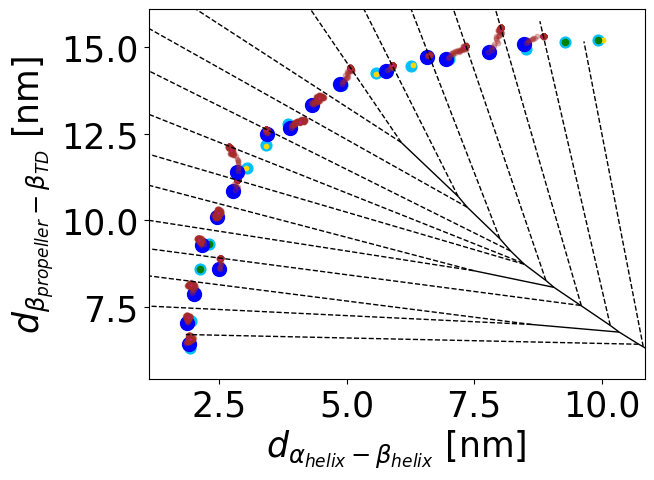

In [106]:
#%matplotlib notebook
%matplotlib inline
import matplotlib.animation

plt.rcParams["animation.html"] = "jshtml"
#import mplcursors

# plot
#fig = plt.figure(figsize=(8,6))
#
fig, ax1 = plt.subplots()

#### PLOT each metastable state
nfake = real_cog_tail_helices_cg_wgan.shape[0]-2450*4
colors = [np.ones(nfake)*1, np.ones(2450)*2, np.ones(2450)*3, np.ones(2450)*4, np.ones(2450)*5]

colors = np.concatenate(colors, axis=0)
#lcmap = (mpl.colors.ListedColormap(['plum', 'gray', 'orange', 'green', 'black']) #'red', 'black'
#        .with_extremes(over='0.25', under='0.75'))
lcmap = (mpl.colors.ListedColormap(['0.7', '0.5', '0.3', '0.1', '0']) #'red', 'black'
        .with_extremes(over='0.25', under='0.75'))

#ax1 = fig.add_subplot(111)

   
i=0
# ax1.scatter(real_cog_tail_helices_cg_wgan[nfake:]/10,
#             real_cog_beta_prop_beta_td_cg_wgan[nfake:]/10, c=colors[nfake:], cmap=lcmap, s=10, alpha=0.4)

ax1.set_ylabel(r"$d_{\beta_{propeller}-\beta_{TD}}$ [nm]")
ax1.set_xlabel(r'$d_{\alpha_{helix}-\beta_{helix}}$ [nm]')

ax1.set_xlim(-1, 12)
ax1.set_ylim(5, 18.5)

x_switch = []
y_switch = []



####  PLOT LOCATION OF INITIAL STRING IMAGES
count_images=0
for fr in beta_int_indices:
    
    ax1.scatter(real_cog_tail_helices_cg_wgan[fr]/10, 
                real_cog_beta_prop_beta_td_cg_wgan[fr]/10, marker='o', s=60, color='deepskyblue', alpha=1)
    
    x = real_cog_tail_helices_cg_wgan[fr]/10
    y = real_cog_beta_prop_beta_td_cg_wgan[fr]/10
    label=fr
    
    #print(f'fr:{fr} image:{count_images} distances:{x} {y}')
    count_images+=1
    
    x_switch.append(x)
    y_switch.append(y)
    
for fr in int1_int2_indices:
    
    ax1.scatter(real_cog_tail_helices_cg_wgan[fr]/10, 
                real_cog_beta_prop_beta_td_cg_wgan[fr]/10, marker='o', s=60, color='deepskyblue', alpha=1)
    
    x = real_cog_tail_helices_cg_wgan[fr]/10
    y = real_cog_beta_prop_beta_td_cg_wgan[fr]/10
    label=fr

    #print(f'fr:{fr} image:{count_images} distances:{x} {y}')
    
    x_switch.append(x)
    y_switch.append(y)
    count_images+=1
    
for fr in int2_open_indices:
    
    ax1.scatter(real_cog_tail_helices_cg_wgan[fr]/10, 
                real_cog_beta_prop_beta_td_cg_wgan[fr]/10, marker='o', s=60, color='deepskyblue', alpha=1)
    
    x = real_cog_tail_helices_cg_wgan[fr]/10
    y = real_cog_beta_prop_beta_td_cg_wgan[fr]/10
    label=fr

    #print(f'fr:{fr} image:{count_images} distances:{x} {y}')
    
    x_switch.append(x)
    y_switch.append(y)
    count_images+=1
    

#### CHECK DISTANCE BETWEEN INITIAL IMAGES. NOT THE SMD STRUCTURES CORRESPONDING TO EACH IMAGE
all_points_test = np.concatenate((beta_int_points,int1_int2_points,int2_open_points))
ax1.scatter(np.array(all_points_test)[:,0], np.array(all_points_test)[:,1],s=10,c='gold')


print(all_points_test)


for i in range(np.array(all_points_test).shape[0]):
    for j in range(i+1, np.array(all_points_test).shape[0]):
        if j-i == 1:
            print(distance(all_points_test[i],all_points_test[j]))
                

#### VORONOI PARTITION ACCORDING TO INITIAL IMAGES
from scipy.spatial import Voronoi, voronoi_plot_2d
from scipy.spatial import ConvexHull
#from scipy.spatial import distance

# Add the first and last points with boundaries
points = np.array(list(zip(x_switch, y_switch)))

# Generate Voronoi tessellation
#vor = Voronoi(points, furthest_site=False)
vor = Voronoi(np.array(all_points_test), furthest_site=False)

# # Plot Voronoi cells
voronoi_plot_2d(vor, ax=ax1, show_vertices=False, show_points=False, line_width=1.)


# COMPUTE DISTANCE OF SMD GENERATED AL-ATOM STRUCTURE AT EACH IMAGE AND PLOT; if needed
path_to_file = '/project2/andrewferguson/sivadasetty/doe/analysis-integrin/string_mechanisms/deadbolt/final_string_initial_cg_frames/'
#path_to_file = '/project2/andrewferguson/sivadasetty/doe/analysis-integrin/string_mechanisms/deadbolt/string_parallel_100k_full_lipid_case/final_string_refine_initial_lipid_aa_frames/'

# for i in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18]:
ref_locations = {}
for i in [3, 4, 17, 18]:
    
    #if i in [3, 17]:
    #    temp_universe = mda.Universe(path_to_file+'/ref_pdb_files/fr_beta_int_resmapped_'+str(i)+'_box_renum.pdb')
    #else:
    temp_universe = mda.Universe(path_to_file+'/fr_beta_int_'+str(i)+'.pdb')
    
    ag1 = temp_universe.atoms.select_atoms('index 155-168')
    ag2 = temp_universe.atoms.select_atoms('index 282-299')
    
#     xdist = np.linalg.norm(ag1.center_of_geometry()-ag2.center_of_geometry())    

    ag3 = temp_universe.atoms.select_atoms('index 0-64')
    ag4 = temp_universe.atoms.select_atoms('index 259-281')

    print(ag1.n_atoms, ag2.n_atoms, ag3.n_atoms, ag4.n_atoms)
    
    #print(ag1.center_of_geometry(pbc=True), ag2.center_of_geometry(pbc=True))
    
#     ydist = distance(ag1.center_of_geometry(), ag2.center_of_geometry())#, temp_universe.dimensions[:3])
#     ydist = np.linalg.norm(ag3.center_of_geometry()-ag4.center_of_geometry())

    xdist = distances.distance_array(ag1.center_of_geometry(),
                                     ag2.center_of_geometry())#, box = temp_universe.dimensions)
    ydist = distances.distance_array(ag3.center_of_geometry(),
                                     ag4.center_of_geometry())#, box = temp_universe.dimensions)
    
    ref_locations[i] = np.array([xdist/10, ydist/10])

    #print(i, xdist/10, ydist/10)
    ax1.scatter(xdist/10, ydist/10, s=20, alpha=1, color='green')
    
    

##     print(rep.select_atoms('index 0 to 168').center_of_geometry())
#    
##     select_tail1 = cg_1_universe.select_atoms('index 155 to 168').center_of_geometry()
##     select_tail2 = cg_1_universe.select_atoms('index 282 to 299').center_of_geometry()
#    
##     cog_tail_helices_cg_wgan.append(np.linalg.norm(select_tail1-select_tail2))
#    
##     select_beta_prop = cg_1_universe.select_atoms('index 0 to 64').center_of_geometry()
##     select_beta_td = cg_1_universe.select_atoms('index 259 to 281').center_of_geometry()
#    
##     cog_beta_prop_beta_td_cg_wgan.append(np.linalg.norm(select_beta_prop-select_beta_td))
    
    
    

    
# COMPUTE DISTANCE OF SMD GENERATED AL-ATOM STRUCTURE AT EACH IMAGE AND PLOT; if needed
path_to_file = '/project2/andrewferguson/sivadasetty/doe/analysis-integrin/string_mechanisms/deadbolt/string_parallel_100k_full_lipid_case/final_string_initial_aa_frames/'

ag1_indices = 'index 14621 14756 14821 14918 15001 15087 15173 15213 15239 15273 15288 15312 15327 15342'
ag2_indices = 'index 25941 26024 26101 26204 26290 26357 26429 26502 26570 26608 26655 26713 26737 26762 26796 26829 26864 26895'
ag3_indices = 'index 57 149 253 379 465 550 621 686 761 865 928 1019 1135 1224 1381 1513 1645 1789 1896 2021 2139 2241 2365 2519 2657 2739 2812 2907 2984 3053 3116 3218 3325 3425 3512 3596 3711 3859 3958 4044 4145 4248 4338 4414 4481 4542 4621 4706 4804 4881 4929 5029 5141 5231 5361 5540 5742 5871 5983 6119 6230 6328 6428 6527 6600'
ag4_indices = 'index 24438 24573 24684 24764 24817 24873 24924 24985 25075 25140 25216 25279 25334 25416 25475 25515 25545 25601 25649 25698 25753 25823 25888'

# ag1_indices = 'index 14621 14756 14821 14918 15001 15087 15173 15213 15239 15273 15288 15312 15327 15342'
# ag2_indices = 'index 25941 26024 26101 26204 26290 26357 26429 26502 26570 26608 26655 26713 26737 26762 26796 26829 26864 26895'
# ag3_indices = 'index 57 149 253 379 465 550 621 686 761 865 928 1019 1135 1224 1381 1513 1645 1789 1896 2021 2139 2241 2365 2519 2657 2739 2812 2907 2984 3053 3116 3218 3325 3425 3512 3596 3711 3859 3958 4044 4145 4248 4338 4414 4481 4542 4621 4706 4804 4881 4929 5029 5141 5231 5361 5540 5742 5871 5983 6119 6230 6328 6428 6527 6600'
# ag4_indices = 'index 24438 24573 24684 24764 24817 24873 24924 24985 25075 25140 25216 25279 25334 25416 25475 25515 25545 25601 25649 25698 25753 25823 25888'

# ag1_indices = 'index 14756-15342'
# ag2_indices = 'index 25941-26895'
# ag3_indices = 'index 57-6600'
# ag4_indices = 'index 24438-25888'

# # 3, 17
# for i in [3, 17]:#0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18]:
#     temp_universe = mda.Universe(path_to_file+'target_md_'+str(i)+'/lframe_box.gro')
    
    
#     ag1 = temp_universe.atoms.select_atoms(ag1_indices)
#     ag2 = temp_universe.atoms.select_atoms(ag2_indices)
#     #ag1 = temp_universe.atoms.select_atoms('index 14621-15342')
#     #ag2 = temp_universe.atoms.select_atoms('index 25941-26895')
    
#     #print(ag1.center_of_geometry(pbc=True), ag2.center_of_geometry(pbc=True))
    
#     #xdist = distance(ag1.center_of_geometry(), ag2.center_of_geometry()) #, temp_universe.dimensions[:3])
    
# #     xdist = np.linalg.norm(ag1.center_of_geometry(pbc=True)-ag2.center_of_geometry(pbc=True))    

#     ag3 = temp_universe.atoms.select_atoms(ag3_indices)
#     ag4 = temp_universe.atoms.select_atoms(ag4_indices)
#     #ag3 = temp_universe.atoms.select_atoms('index 57-6600')
#     #ag4 = temp_universe.atoms.select_atoms('index 24438-25888')

#     #print(ag1.center_of_geometry(pbc=True), ag2.center_of_geometry(pbc=True))
    
# #     ydist = distance(ag1.center_of_geometry(), ag2.center_of_geometry())#, temp_universe.dimensions[:3])
# #     ydist = np.linalg.norm(ag3.center_of_geometry(pbc=True)-ag4.center_of_geometry(pbc=True))
    
    
#     xdist = distances.distance_array(ag1.center_of_geometry(pbc=True),
#                                      ag2.center_of_geometry(pbc=True), box = temp_universe.dimensions)
#     ydist = distances.distance_array(ag3.center_of_geometry(pbc=True),
#                                      ag4.center_of_geometry(pbc=True), box = temp_universe.dimensions)
            

#     print(i, xdist/10, ydist/10)
#     ax1.scatter(xdist/10, ydist/10, s=20, alpha=1, color='red')
    

# # # COMPUTE DISTANCES FROM SIMULATIONS STARTED AT EACH IMAGE AND PLOT; if needed
path_to_file = '/project2/andrewferguson/sivadasetty/doe/analysis-integrin/string_mechanisms/deadbolt/string_parallel_100k_full_lipid_case/final_string/'

from matplotlib.pyplot import cm
color = cm.jet(np.linspace(0, 1, 20))
runningaverages = []

distance_from_ref_locations = {}

for i in range(17):
#     temp_universe = mda.Universe(path_to_file+ '/iter0/target_md_' + str(i) + '/minimize.pdb', 
#                                  path_to_file+ '/iter0/target_md_' + str(i) + '/output.xtc')
    
    temp_universe = mda.Universe(path_to_file+ '/iter1/target_md_' + str(i) + '/minimize-protein.pdb', 
                                 path_to_file+ '/iter1/target_md_' + str(i) + '/output-protein.dcd')
                                 
                                 #path_to_file+ '../final_string_refine_initial_lipid_aa_frames/iter0/target_md_' + str(i) + '/output_smd.xtc')
    
    ag1 = temp_universe.atoms.select_atoms(ag1_indices)
    ag2 = temp_universe.atoms.select_atoms(ag2_indices)
    ag3 = temp_universe.atoms.select_atoms(ag3_indices)
    ag4 = temp_universe.atoms.select_atoms(ag4_indices)
    
    avg_x = []
    avg_y = []
    
    per_frame_distance = []
    for ts in temp_universe.trajectory[::1]: #[::10]
        
#         xdist = np.linalg.norm(ag1.center_of_mass()-ag2.center_of_mass())    
#         ydist = np.linalg.norm(ag3.center_of_mass()-ag4.center_of_mass())

        xdist = distances.distance_array(ag1.center_of_geometry(),
                                         ag2.center_of_geometry(), box = temp_universe.dimensions)
        ydist = distances.distance_array(ag3.center_of_geometry(),
                                         ag4.center_of_geometry(), box = temp_universe.dimensions)
        
        avg_x.append(xdist)
        avg_y.append(ydist)
        
        ax1.scatter(xdist/10, ydist/10, s=10, alpha=0.3, color='brown') # color=color[i]) 
        
        
        # Compute distance with the image center
        #print(f'frame:{ts.frame}')
#         per_frame_distance.append(distance(np.array([xdist/10, ydist/10]), ref_locations[i]))
        #print(f'frame:{ts.frame} distance:{}')
        
#         if ts.frame == 15 and i == 3:
#             print(ts.frame)
#             ax1.scatter(xdist/10, ydist/10, s=10, alpha=0.7, color='blue') # color=color[i]) 
#             print(distance(np.array([xdist/10, ydist/10]), ref_locations[3]),
#                   distance(np.array([xdist/10, ydist/10]), ref_locations[4]))
            
        if ts.frame == 0: # and i == 17:
            ax1.scatter(xdist/10, ydist/10, s=100, alpha=1, color='blue') # color=color[i])
            #print(ts.frame)
#             print(distance(np.array([xdist/10, ydist/10]), ref_locations[17]),
#                   distance(np.array([xdist/10, ydist/10]), ref_locations[18]))
            #print('dists')
            #print(tuple(np.array([xdist/10, ydist/10])), ref_locations[17])
            #print(np.linalg.norm(tuple(np.array([xdist/10, ydist/10]))-ref_locations[17]))
            #print(np.linalg.norm(tuple(np.array([xdist/10, ydist/10]))-ref_locations[18]))
    

        
    distance_from_ref_locations[i] = np.array(per_frame_distance)   
    ax1.scatter(np.mean(avg_x)/10, np.mean(avg_y)/10, s=1, alpha=0.3, color='magenta') # color='gold')
    
#     runningaverages.append([np.mean(avg_x)/10, np.mean(avg_y)/10])
#     # revise the string




# DOUBLE CHECK (NOTE 17 is wrong; structure minimize_smd needs to be updated. it was previously generated without
# the pbc distance calculations. frame index of 73 is the minimum one for 17.)

# # # # COMPUTE DISTANCES FROM SIMULATIONS STARTED AT EACH IMAGE AND PLOT; if needed
# path_to_file = '/project2/andrewferguson/sivadasetty/doe/analysis-integrin/string_mechanisms/deadbolt/string_parallel_100k_full_lipid_case/final_string/'

# from matplotlib.pyplot import cm
# color = cm.jet(np.linspace(0, 1, 20))
# runningaverages = []

# for i in [3, 17]: #range(19):
#     temp_universe = mda.Universe(path_to_file+ '../final_string_refine_initial_lipid_aa_frames/iter0/target_md_' + str(i) + '/minimize_smd.pdb')
    
#     ag1 = temp_universe.atoms.select_atoms(ag1_indices)
#     ag2 = temp_universe.atoms.select_atoms(ag2_indices)
#     ag3 = temp_universe.atoms.select_atoms(ag3_indices)
#     ag4 = temp_universe.atoms.select_atoms(ag4_indices)
            
# #     xdist = np.linalg.norm(ag1.center_of_mass()-ag2.center_of_mass())    
# #     ydist = np.linalg.norm(ag3.center_of_mass()-ag4.center_of_mass())
    
#     xdist = distances.distance_array(ag1.center_of_geometry(),
#                                      ag2.center_of_geometry(), box = temp_universe.dimensions)
#     ydist = distances.distance_array(ag3.center_of_geometry(),
#                                      ag4.center_of_geometry(), box = temp_universe.dimensions)
    

#     ld = distance(np.array([xdist/10, ydist/10]), ref_locations[i])
#     print(f'frame:{i} distance:{ld}')
                
#  ###   distance_from_ref_locations[i] = np.array(per_frame_distance)   
#     ax1.scatter(xdist/10, ydist/10, s=10, alpha=0.8, color='black') # color='gold')
    


    
# #### REPARAMETERIZE FOR ADJUSTING DISTANCE BETWEEN NEW IMAGES


# deltat=0.1
# kappa=0.1
# N=len(runningaverages)-1 # 0 to N notation; so N in paper is not number of images but - 1 of it.
# kappa_n=kappa*(N+1)*deltat

# new_images_vector_B_2D = []
# for j in range(2):
#     new_images_vector_B = np.zeros(N+1)
#     for i in range(N+1):

#         new_images_vector_B[i] = all_points_test[i][j] - deltat*(all_points_test[i][j] - runningaverages[i][j])
        
#     new_images_vector_B_2D.append(new_images_vector_B)

# newimages_matrix_A_2D = []
# for j in range(2):
#     newimages_matrix_A = np.eye(N+1)
#     for i in range(N+1):
    
#         if i == 0 or i == N:
#             continue
#         else:
#             newimages_matrix_A[i,i-1]=-kappa_n
#             newimages_matrix_A[i,i]=(1+2*kappa_n)
#             newimages_matrix_A[i,i+1]=-kappa_n
            
#     newimages_matrix_A_2D.append(newimages_matrix_A)
    
    
# #### SOLVE LINEAR EQUATIONS FOR LOCATION OF NEW IMAGES  
# newimages = []   
# for j in range(2):
#     newimages.append(np.linalg.solve(newimages_matrix_A_2D[j], new_images_vector_B_2D[j]))   

# # Add the first and last points with boundaries
# newimages = np.array(list(zip(newimages[0], newimages[1])))
    
# ax1.scatter(np.array(newimages)[:,0], np.array(newimages)[:,1],s=60,c='magenta')

# #### REPARAMTERIZE FOR KEEPING THE IMAGES EQUIDISTANT
# reparameterized_images = []
# for i in range(len(newimages)):
    
#     reparameterized_images.append(reparameterize(newimages, i))
    
# ax1.scatter(np.array(reparameterized_images)[:,0], np.array(reparameterized_images)[:,1],s=40,c='white')

# print('reparameterized distances \n')
# for i in range(np.array(reparameterized_images).shape[0]):
#     for j in range(i+1, np.array(reparameterized_images).shape[0]):
#         if j-i == 1:
#             print(i, j, distance(reparameterized_images[i], reparameterized_images[j]))
#             #print(np.sqrt( (reparameterized_images[i][0]-reparameterized_images[j][0])**2 + (reparameterized_images[i][1]-reparameterized_images[j][1])**2) )


# # #plt.axis('equal')
# ax1.set_xlim(vor.min_bound[0] - 2, vor.max_bound[0] + 3)
# ax1.set_ylim(vor.min_bound[1] - 2, vor.max_bound[1] + 3)

# # # Set the number of ticks on the x-axis directly
# # num_ticks = 6
# # locator = ticker.MaxNLocator(num_ticks)
# # plt.gca().xaxis.set_major_locator(locator)

# plt.show()
# fig.tight_layout()
# #ax1.legend(fontsize=12, loc='lower right')#bbox_to_anchor=(1.1, 1.0),

# #plt.tight_layout()
# #fig.savefig("distance_cg_300_deadbolt_domains_2d.png",dpi=150)


In [34]:
np.argmin(distance_from_ref_locations[3])

15

In [33]:
distance_from_ref_locations[3]

array([0.44994425, 0.39474471, 0.43074223, 0.43996853, 0.52498834,
       0.52364703, 0.49977079, 0.46015072, 0.4187171 , 0.40151204,
       0.40366172, 0.37620244, 0.45940403, 0.44630122, 0.42660583,
       0.34725607, 0.38998576, 0.46855247, 0.47344746, 0.46093683,
       0.5146205 , 0.53449407, 0.53919712, 0.56355792, 0.60078375,
       0.55262685, 0.60196358, 0.58228551, 0.52018735, 0.61940194,
       0.61431701, 0.59494333, 0.60849968, 0.61090634, 0.65151264,
       0.6127234 , 0.64680263, 0.63979329, 0.64438723, 0.57007519,
       0.57994705, 0.60074458, 0.63634336, 0.58731933, 0.59607884,
       0.61236891, 0.50984211, 0.53414053, 0.47756688, 0.50080547,
       0.53780596, 0.60386932, 0.56479758, 0.62014273, 0.60730831,
       0.63907623, 0.63175749, 0.62216104, 0.56120971, 0.51711243,
       0.54569122, 0.52163133, 0.56243822, 0.59236543, 0.54027424,
       0.57261138, 0.62281382, 0.56550137, 0.57342712, 0.54788461,
       0.51463876, 0.53223844, 0.52181647, 0.50697884, 0.44500

In [109]:
for i in range(1+1,6):
    print(i)

2
3
4
5


## check reparameterized images

[[ 1.92740418  6.32755634]
 [ 1.95147825  7.08935996]
 [ 2.00508391  7.84965951]
 [ 2.14498217  8.59887943]
 [ 2.2894458   9.34724976]
 [ 2.45884303 10.09037394]
 [ 2.73380458 10.80116016]
 [ 3.03560236 11.5010476 ]
 [ 3.4204724  12.15888834]
 [ 3.87085137 12.77377672]
 [ 4.35625171 13.36140748]
 [ 4.88199026 13.91190964]
 [ 5.57340259 14.23237167]
 [ 6.29456104 14.4789135 ]
 [ 7.03169938 14.67269036]
 [ 7.77419929 14.844799  ]
 [ 8.52200106 14.99215441]
 [ 9.27493833 15.11053705]
 [10.03056293 15.21034195]]
0.7621839098789852
0.7621869688927606
0.7621692824946936
0.7621862526653576
0.7621869688927625
0.7621160687735035
0.7621839239645577
0.7621544328296298
0.7621869417559533
0.7621833135494629
0.7612185303682206
0.7620675247073464
0.7621367291955813
0.7621826593150235
0.7621859941512795
0.7621818120414509
0.7621869688927604
0.7621873449589494
14 18 65 23
14 18 65 23
14 18 65 23
14 18 65 23
14 18 65 23
14 18 65 23
14 18 65 23
14 18 65 23
14 18 65 23
14 18 65 23
14 18 65 23
14 18 65 23


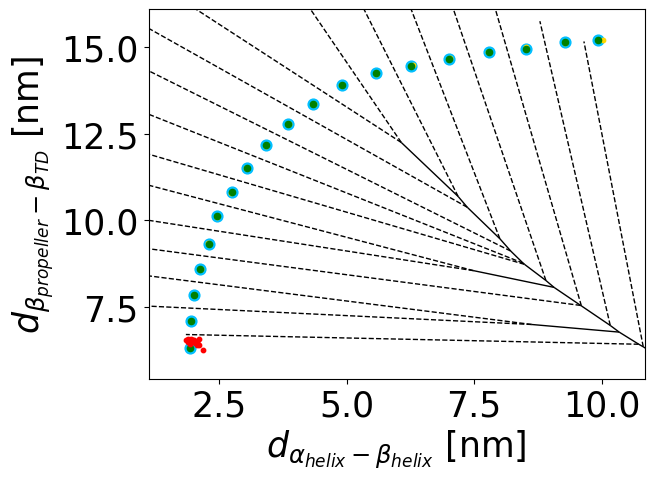

In [58]:
#%matplotlib notebook
%matplotlib inline
import matplotlib.animation

plt.rcParams["animation.html"] = "jshtml"
#import mplcursors

# plot
#fig = plt.figure(figsize=(8,6))
#
fig, ax1 = plt.subplots()

#### PLOT each metastable state
nfake = real_cog_tail_helices_cg_wgan.shape[0]-2450*4
colors = [np.ones(nfake)*1, np.ones(2450)*2, np.ones(2450)*3, np.ones(2450)*4, np.ones(2450)*5]

colors = np.concatenate(colors, axis=0)
#lcmap = (mpl.colors.ListedColormap(['plum', 'gray', 'orange', 'green', 'black']) #'red', 'black'
#        .with_extremes(over='0.25', under='0.75'))
lcmap = (mpl.colors.ListedColormap(['0.7', '0.5', '0.3', '0.1', '0']) #'red', 'black'
        .with_extremes(over='0.25', under='0.75'))

#ax1 = fig.add_subplot(111)

   
i=0
# ax1.scatter(real_cog_tail_helices_cg_wgan[nfake:]/10,
#             real_cog_beta_prop_beta_td_cg_wgan[nfake:]/10, c=colors[nfake:], cmap=lcmap, s=10, alpha=0.4)

ax1.set_ylabel(r"$d_{\beta_{propeller}-\beta_{TD}}$ [nm]")
ax1.set_xlabel(r'$d_{\alpha_{helix}-\beta_{helix}}$ [nm]')

ax1.set_xlim(-1, 12)
ax1.set_ylim(5, 18.5)

x_switch = []
y_switch = []



####  PLOT LOCATION OF INITIAL STRING IMAGES
count_images=0
for fr in beta_int_indices:
    
    ax1.scatter(real_cog_tail_helices_cg_wgan[fr]/10, 
                real_cog_beta_prop_beta_td_cg_wgan[fr]/10, marker='o', s=60, color='deepskyblue', alpha=1)
    
    x = real_cog_tail_helices_cg_wgan[fr]/10
    y = real_cog_beta_prop_beta_td_cg_wgan[fr]/10
    label=fr
    
    #print(f'fr:{fr} image:{count_images} distances:{x} {y}')
    count_images+=1
    
    x_switch.append(x)
    y_switch.append(y)
    
for fr in int1_int2_indices:
    
    ax1.scatter(real_cog_tail_helices_cg_wgan[fr]/10, 
                real_cog_beta_prop_beta_td_cg_wgan[fr]/10, marker='o', s=60, color='deepskyblue', alpha=1)
    
    x = real_cog_tail_helices_cg_wgan[fr]/10
    y = real_cog_beta_prop_beta_td_cg_wgan[fr]/10
    label=fr

    #print(f'fr:{fr} image:{count_images} distances:{x} {y}')
    
    x_switch.append(x)
    y_switch.append(y)
    count_images+=1
    
for fr in int2_open_indices:
    
    ax1.scatter(real_cog_tail_helices_cg_wgan[fr]/10, 
                real_cog_beta_prop_beta_td_cg_wgan[fr]/10, marker='o', s=60, color='deepskyblue', alpha=1)
    
    x = real_cog_tail_helices_cg_wgan[fr]/10
    y = real_cog_beta_prop_beta_td_cg_wgan[fr]/10
    label=fr

    #print(f'fr:{fr} image:{count_images} distances:{x} {y}')
    
    x_switch.append(x)
    y_switch.append(y)
    count_images+=1
    

#### CHECK DISTANCE BETWEEN INITIAL IMAGES. NOT THE SMD STRUCTURES CORRESPONDING TO EACH IMAGE
all_points_test = np.concatenate((beta_int_points,int1_int2_points,int2_open_points))
ax1.scatter(np.array(all_points_test)[:,0], np.array(all_points_test)[:,1],s=10,c='gold')


print(all_points_test)


for i in range(np.array(all_points_test).shape[0]):
    for j in range(i+1, np.array(all_points_test).shape[0]):
        if j-i == 1:
            print(distance(all_points_test[i],all_points_test[j]))
                

#### VORONOI PARTITION ACCORDING TO INITIAL IMAGES
from scipy.spatial import Voronoi, voronoi_plot_2d
from scipy.spatial import ConvexHull
#from scipy.spatial import distance

# Add the first and last points with boundaries
points = np.array(list(zip(x_switch, y_switch)))

# Generate Voronoi tessellation
vor = Voronoi(all_points_test, furthest_site=False)
# # Plot Voronoi cells
voronoi_plot_2d(vor, ax=ax1, show_vertices=False, show_points=False, line_width=1.)


# COMPUTE DISTANCE OF SMD GENERATED AL-ATOM STRUCTURE AT EACH IMAGE AND PLOT; if needed
path_to_file = '/project2/andrewferguson/sivadasetty/doe/analysis-integrin/string_mechanisms/deadbolt/final_string_initial_cg_frames/'
#path_to_file = '/project2/andrewferguson/sivadasetty/doe/analysis-integrin/string_mechanisms/deadbolt/string_parallel_100k_full_lipid_case/final_string_refine_initial_lipid_aa_frames/'

# for i in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18]:
ref_locations = {}
for i in range(19):
    
    #if i in [3, 17]:
    #    temp_universe = mda.Universe(path_to_file+'/ref_pdb_files/fr_beta_int_resmapped_'+str(i)+'_box_renum.pdb')
    #else:
    temp_universe = mda.Universe(path_to_file+'/fr_beta_int_'+str(i)+'.pdb')
    
    ag1 = temp_universe.atoms.select_atoms('index 155-168')
    ag2 = temp_universe.atoms.select_atoms('index 282-299')
    
#     xdist = np.linalg.norm(ag1.center_of_geometry()-ag2.center_of_geometry())    

    ag3 = temp_universe.atoms.select_atoms('index 0-64')
    ag4 = temp_universe.atoms.select_atoms('index 259-281')

    print(ag1.n_atoms, ag2.n_atoms, ag3.n_atoms, ag4.n_atoms)
    
    #print(ag1.center_of_geometry(pbc=True), ag2.center_of_geometry(pbc=True))
    
#     ydist = distance(ag1.center_of_geometry(), ag2.center_of_geometry())#, temp_universe.dimensions[:3])
#     ydist = np.linalg.norm(ag3.center_of_geometry()-ag4.center_of_geometry())

    xdist = distances.distance_array(ag1.center_of_geometry(),
                                     ag2.center_of_geometry())#, box = temp_universe.dimensions)
    ydist = distances.distance_array(ag3.center_of_geometry(),
                                     ag4.center_of_geometry())#, box = temp_universe.dimensions)
    
    ref_locations[i] = np.array([xdist/10, ydist/10])

    #print(i, xdist/10, ydist/10)
    ax1.scatter(xdist/10, ydist/10, s=20, alpha=1, color='green')
    
    
    

    
# COMPUTE DISTANCE OF SMD GENERATED AL-ATOM STRUCTURE AT EACH IMAGE AND PLOT; if needed
path_to_file = '/project2/andrewferguson/sivadasetty/doe/analysis-integrin/string_mechanisms/deadbolt/string_parallel_100k_full_lipid_case/final_string_initial_aa_frames/'

ag1_indices = 'index 14621 14756 14821 14918 15001 15087 15173 15213 15239 15273 15288 15312 15327 15342'
ag2_indices = 'index 25941 26024 26101 26204 26290 26357 26429 26502 26570 26608 26655 26713 26737 26762 26796 26829 26864 26895'
ag3_indices = 'index 57 149 253 379 465 550 621 686 761 865 928 1019 1135 1224 1381 1513 1645 1789 1896 2021 2139 2241 2365 2519 2657 2739 2812 2907 2984 3053 3116 3218 3325 3425 3512 3596 3711 3859 3958 4044 4145 4248 4338 4414 4481 4542 4621 4706 4804 4881 4929 5029 5141 5231 5361 5540 5742 5871 5983 6119 6230 6328 6428 6527 6600'
ag4_indices = 'index 24438 24573 24684 24764 24817 24873 24924 24985 25075 25140 25216 25279 25334 25416 25475 25515 25545 25601 25649 25698 25753 25823 25888'

# ag1_indices = 'index 14621 14756 14821 14918 15001 15087 15173 15213 15239 15273 15288 15312 15327 15342'
# ag2_indices = 'index 25941 26024 26101 26204 26290 26357 26429 26502 26570 26608 26655 26713 26737 26762 26796 26829 26864 26895'
# ag3_indices = 'index 57 149 253 379 465 550 621 686 761 865 928 1019 1135 1224 1381 1513 1645 1789 1896 2021 2139 2241 2365 2519 2657 2739 2812 2907 2984 3053 3116 3218 3325 3425 3512 3596 3711 3859 3958 4044 4145 4248 4338 4414 4481 4542 4621 4706 4804 4881 4929 5029 5141 5231 5361 5540 5742 5871 5983 6119 6230 6328 6428 6527 6600'
# ag4_indices = 'index 24438 24573 24684 24764 24817 24873 24924 24985 25075 25140 25216 25279 25334 25416 25475 25515 25545 25601 25649 25698 25753 25823 25888'

# ag1_indices = 'index 14756-15342'
# ag2_indices = 'index 25941-26895'
# ag3_indices = 'index 57-6600'
# ag4_indices = 'index 24438-25888'



# DOUBLE CHECK (NOTE 17 is wrong; structure minimize_smd needs to be updated. it was previously generated without
# the pbc distance calculations. frame index of 73 is the minimum one for 17.)

# # # COMPUTE DISTANCES FROM SIMULATIONS STARTED AT EACH IMAGE AND PLOT; if needed
path_to_file = '/project2/andrewferguson/sivadasetty/doe/analysis-integrin/string_mechanisms/deadbolt/string_parallel_100k_full_lipid_case/final_string/'

from matplotlib.pyplot import cm
color = cm.jet(np.linspace(0, 1, 20))
runningaverages = []

for i in [0]:
    temp_universe = mda.Universe(path_to_file+ '/iter0/target_md_' + str(i) + '/minimize.pdb',
                                 path_to_file+ '/iter0/target_md_' + str(i) + '/output.xtc')
    
    ag1 = temp_universe.atoms.select_atoms(ag1_indices)
    ag2 = temp_universe.atoms.select_atoms(ag2_indices)
    ag3 = temp_universe.atoms.select_atoms(ag3_indices)
    ag4 = temp_universe.atoms.select_atoms(ag4_indices)

    avg_x = []
    avg_y = []
    
    per_frame_distance = []
    for ts in temp_universe.trajectory[::1]: #[::10]
        
        xdist = distances.distance_array(ag1.center_of_geometry(),
                                         ag2.center_of_geometry(), box = temp_universe.dimensions)
        ydist = distances.distance_array(ag3.center_of_geometry(),
                                         ag4.center_of_geometry(), box = temp_universe.dimensions)
        
        avg_x.append(xdist)
        avg_y.append(ydist)
        
#         print(ts.time)
#         print(xdist, ydist)
        ax1.scatter(xdist/10, ydist/10, s=10, alpha=1, color='red') # color=color[i]) 
        
        
        # Compute distance with the image center
        #print(f'frame:{ts.frame}')
        #per_frame_distance.append(distance(np.array([xdist/10, ydist/10]), ref_locations[i]))
        #print(f'frame:{ts.frame} distance:{}')

        
#     distance_from_ref_locations[i] = np.array(per_frame_distance)   
#     ax1.scatter(np.mean(avg_x)/10, np.mean(avg_y)/10, s=10, alpha=0.2, color='magenta') # color='gold')


    

    
    

[[ 1.92740418  6.32755634]
 [ 1.95147825  7.08935996]
 [ 2.00508391  7.84965951]
 [ 2.14498217  8.59887943]
 [ 2.2894458   9.34724976]
 [ 2.45884303 10.09037394]
 [ 2.73380458 10.80116016]
 [ 3.03560236 11.5010476 ]
 [ 3.4204724  12.15888834]
 [ 3.87085137 12.77377672]
 [ 4.35625171 13.36140748]
 [ 4.88199026 13.91190964]
 [ 5.57340259 14.23237167]
 [ 6.29456104 14.4789135 ]
 [ 7.03169938 14.67269036]
 [ 7.77419929 14.844799  ]
 [ 8.52200106 14.99215441]
 [ 9.27493833 15.11053705]
 [10.03056293 15.21034195]]
0.7621839098789852
0.7621869688927606
0.7621692824946936
0.7621862526653576
0.7621869688927625
0.7621160687735035
0.7621839239645577
0.7621544328296298
0.7621869417559533
0.7621833135494629
0.7612185303682206
0.7620675247073464
0.7621367291955813
0.7621826593150235
0.7621859941512795
0.7621818120414509
0.7621869688927604
0.7621873449589494
14 18 65 23
14 18 65 23
14 18 65 23
14 18 65 23
14 18 65 23
14 18 65 23
14 18 65 23
14 18 65 23
14 18 65 23
14 18 65 23
14 18 65 23
14 18 65 23


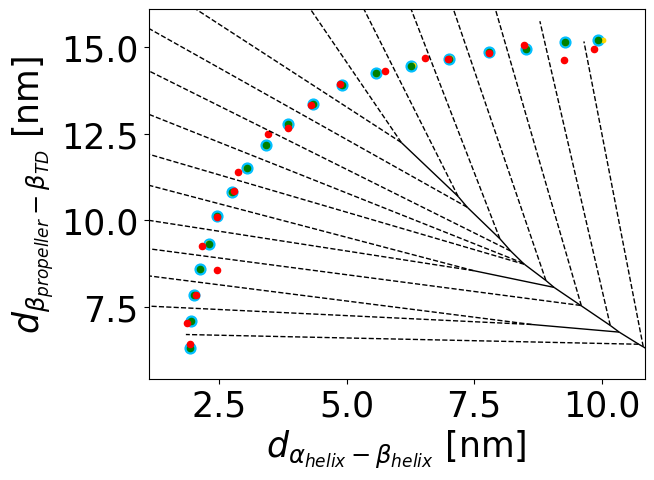

In [111]:
#%matplotlib notebook
%matplotlib inline
import matplotlib.animation

plt.rcParams["animation.html"] = "jshtml"
#import mplcursors

# plot
#fig = plt.figure(figsize=(8,6))
#
fig, ax1 = plt.subplots()

#### PLOT each metastable state
nfake = real_cog_tail_helices_cg_wgan.shape[0]-2450*4
colors = [np.ones(nfake)*1, np.ones(2450)*2, np.ones(2450)*3, np.ones(2450)*4, np.ones(2450)*5]

colors = np.concatenate(colors, axis=0)
#lcmap = (mpl.colors.ListedColormap(['plum', 'gray', 'orange', 'green', 'black']) #'red', 'black'
#        .with_extremes(over='0.25', under='0.75'))
lcmap = (mpl.colors.ListedColormap(['0.7', '0.5', '0.3', '0.1', '0']) #'red', 'black'
        .with_extremes(over='0.25', under='0.75'))

#ax1 = fig.add_subplot(111)

   
i=0
# ax1.scatter(real_cog_tail_helices_cg_wgan[nfake:]/10,
#             real_cog_beta_prop_beta_td_cg_wgan[nfake:]/10, c=colors[nfake:], cmap=lcmap, s=10, alpha=0.4)

ax1.set_ylabel(r"$d_{\beta_{propeller}-\beta_{TD}}$ [nm]")
ax1.set_xlabel(r'$d_{\alpha_{helix}-\beta_{helix}}$ [nm]')

ax1.set_xlim(-1, 12)
ax1.set_ylim(5, 18.5)

x_switch = []
y_switch = []



####  PLOT LOCATION OF INITIAL STRING IMAGES
count_images=0
for fr in beta_int_indices:
    
    ax1.scatter(real_cog_tail_helices_cg_wgan[fr]/10, 
                real_cog_beta_prop_beta_td_cg_wgan[fr]/10, marker='o', s=60, color='deepskyblue', alpha=1)
    
    x = real_cog_tail_helices_cg_wgan[fr]/10
    y = real_cog_beta_prop_beta_td_cg_wgan[fr]/10
    label=fr
    
    #print(f'fr:{fr} image:{count_images} distances:{x} {y}')
    count_images+=1
    
    x_switch.append(x)
    y_switch.append(y)
    
for fr in int1_int2_indices:
    
    ax1.scatter(real_cog_tail_helices_cg_wgan[fr]/10, 
                real_cog_beta_prop_beta_td_cg_wgan[fr]/10, marker='o', s=60, color='deepskyblue', alpha=1)
    
    x = real_cog_tail_helices_cg_wgan[fr]/10
    y = real_cog_beta_prop_beta_td_cg_wgan[fr]/10
    label=fr

    #print(f'fr:{fr} image:{count_images} distances:{x} {y}')
    
    x_switch.append(x)
    y_switch.append(y)
    count_images+=1
    
for fr in int2_open_indices:
    
    ax1.scatter(real_cog_tail_helices_cg_wgan[fr]/10, 
                real_cog_beta_prop_beta_td_cg_wgan[fr]/10, marker='o', s=60, color='deepskyblue', alpha=1)
    
    x = real_cog_tail_helices_cg_wgan[fr]/10
    y = real_cog_beta_prop_beta_td_cg_wgan[fr]/10
    label=fr

    #print(f'fr:{fr} image:{count_images} distances:{x} {y}')
    
    x_switch.append(x)
    y_switch.append(y)
    count_images+=1
    

#### CHECK DISTANCE BETWEEN INITIAL IMAGES. NOT THE SMD STRUCTURES CORRESPONDING TO EACH IMAGE
all_points_test = np.concatenate((beta_int_points,int1_int2_points,int2_open_points))
ax1.scatter(np.array(all_points_test)[:,0], np.array(all_points_test)[:,1],s=10,c='gold')


print(all_points_test)


for i in range(np.array(all_points_test).shape[0]):
    for j in range(i+1, np.array(all_points_test).shape[0]):
        if j-i == 1:
            print(distance(all_points_test[i],all_points_test[j]))
                

#### VORONOI PARTITION ACCORDING TO INITIAL IMAGES
from scipy.spatial import Voronoi, voronoi_plot_2d
from scipy.spatial import ConvexHull
#from scipy.spatial import distance

# Add the first and last points with boundaries
points = np.array(list(zip(x_switch, y_switch)))

# Generate Voronoi tessellation
vor = Voronoi(all_points_test, furthest_site=False)
# # Plot Voronoi cells
voronoi_plot_2d(vor, ax=ax1, show_vertices=False, show_points=False, line_width=1.)


# COMPUTE DISTANCE OF SMD GENERATED AL-ATOM STRUCTURE AT EACH IMAGE AND PLOT; if needed
path_to_file = '/project2/andrewferguson/sivadasetty/doe/analysis-integrin/string_mechanisms/deadbolt/final_string_initial_cg_frames/'
#path_to_file = '/project2/andrewferguson/sivadasetty/doe/analysis-integrin/string_mechanisms/deadbolt/string_parallel_100k_full_lipid_case/final_string_refine_initial_lipid_aa_frames/'

# for i in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18]:
ref_locations = {}
for i in range(19):
    
    #if i in [3, 17]:
    #    temp_universe = mda.Universe(path_to_file+'/ref_pdb_files/fr_beta_int_resmapped_'+str(i)+'_box_renum.pdb')
    #else:
    temp_universe = mda.Universe(path_to_file+'/fr_beta_int_'+str(i)+'.pdb')
    
    ag1 = temp_universe.atoms.select_atoms('index 155-168')
    ag2 = temp_universe.atoms.select_atoms('index 282-299')
    
#     xdist = np.linalg.norm(ag1.center_of_geometry()-ag2.center_of_geometry())    

    ag3 = temp_universe.atoms.select_atoms('index 0-64')
    ag4 = temp_universe.atoms.select_atoms('index 259-281')

    print(ag1.n_atoms, ag2.n_atoms, ag3.n_atoms, ag4.n_atoms)
    
    #print(ag1.center_of_geometry(pbc=True), ag2.center_of_geometry(pbc=True))
    
#     ydist = distance(ag1.center_of_geometry(), ag2.center_of_geometry())#, temp_universe.dimensions[:3])
#     ydist = np.linalg.norm(ag3.center_of_geometry()-ag4.center_of_geometry())

    xdist = distances.distance_array(ag1.center_of_geometry(),
                                     ag2.center_of_geometry())#, box = temp_universe.dimensions)
    ydist = distances.distance_array(ag3.center_of_geometry(),
                                     ag4.center_of_geometry())#, box = temp_universe.dimensions)
    
    ref_locations[i] = np.array([xdist/10, ydist/10])

    #print(i, xdist/10, ydist/10)
    ax1.scatter(xdist/10, ydist/10, s=20, alpha=1, color='green')
    
    
    

    
# COMPUTE DISTANCE OF SMD GENERATED AL-ATOM STRUCTURE AT EACH IMAGE AND PLOT; if needed
path_to_file = '/project2/andrewferguson/sivadasetty/doe/analysis-integrin/string_mechanisms/deadbolt/string_parallel_100k_full_lipid_case/final_string_initial_aa_frames/'

ag1_indices = 'index 14621 14756 14821 14918 15001 15087 15173 15213 15239 15273 15288 15312 15327 15342'
ag2_indices = 'index 25941 26024 26101 26204 26290 26357 26429 26502 26570 26608 26655 26713 26737 26762 26796 26829 26864 26895'
ag3_indices = 'index 57 149 253 379 465 550 621 686 761 865 928 1019 1135 1224 1381 1513 1645 1789 1896 2021 2139 2241 2365 2519 2657 2739 2812 2907 2984 3053 3116 3218 3325 3425 3512 3596 3711 3859 3958 4044 4145 4248 4338 4414 4481 4542 4621 4706 4804 4881 4929 5029 5141 5231 5361 5540 5742 5871 5983 6119 6230 6328 6428 6527 6600'
ag4_indices = 'index 24438 24573 24684 24764 24817 24873 24924 24985 25075 25140 25216 25279 25334 25416 25475 25515 25545 25601 25649 25698 25753 25823 25888'

# ag1_indices = 'index 14621 14756 14821 14918 15001 15087 15173 15213 15239 15273 15288 15312 15327 15342'
# ag2_indices = 'index 25941 26024 26101 26204 26290 26357 26429 26502 26570 26608 26655 26713 26737 26762 26796 26829 26864 26895'
# ag3_indices = 'index 57 149 253 379 465 550 621 686 761 865 928 1019 1135 1224 1381 1513 1645 1789 1896 2021 2139 2241 2365 2519 2657 2739 2812 2907 2984 3053 3116 3218 3325 3425 3512 3596 3711 3859 3958 4044 4145 4248 4338 4414 4481 4542 4621 4706 4804 4881 4929 5029 5141 5231 5361 5540 5742 5871 5983 6119 6230 6328 6428 6527 6600'
# ag4_indices = 'index 24438 24573 24684 24764 24817 24873 24924 24985 25075 25140 25216 25279 25334 25416 25475 25515 25545 25601 25649 25698 25753 25823 25888'

# ag1_indices = 'index 14756-15342'
# ag2_indices = 'index 25941-26895'
# ag3_indices = 'index 57-6600'
# ag4_indices = 'index 24438-25888'


path_to_file = '/project2/andrewferguson/sivadasetty/doe/analysis-integrin/string_mechanisms/deadbolt/string_parallel_100k_full_lipid_case/final_string/iter1/initial_frames/'

for i in range(19):#0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18]:
    temp_universe = mda.Universe(path_to_file+'/reparameterized_image_'+str(i)+'.gro')
    
    
    ag1 = temp_universe.atoms.select_atoms(ag1_indices)
    ag2 = temp_universe.atoms.select_atoms(ag2_indices)
    #ag1 = temp_universe.atoms.select_atoms('index 14621-15342')
    #ag2 = temp_universe.atoms.select_atoms('index 25941-26895')
    
    #print(ag1.center_of_geometry(pbc=True), ag2.center_of_geometry(pbc=True))
    
    #xdist = distance(ag1.center_of_geometry(), ag2.center_of_geometry()) #, temp_universe.dimensions[:3])
    
#     xdist = np.linalg.norm(ag1.center_of_geometry(pbc=True)-ag2.center_of_geometry(pbc=True))    

    ag3 = temp_universe.atoms.select_atoms(ag3_indices)
    ag4 = temp_universe.atoms.select_atoms(ag4_indices)
    #ag3 = temp_universe.atoms.select_atoms('index 57-6600')
    #ag4 = temp_universe.atoms.select_atoms('index 24438-25888')

    #print(ag1.center_of_geometry(pbc=True), ag2.center_of_geometry(pbc=True))
    
#     ydist = distance(ag1.center_of_geometry(), ag2.center_of_geometry())#, temp_universe.dimensions[:3])
#     ydist = np.linalg.norm(ag3.center_of_geometry(pbc=True)-ag4.center_of_geometry(pbc=True))
    
    
    xdist = distances.distance_array(ag1.center_of_geometry(),
                                     ag2.center_of_geometry(), box = temp_universe.dimensions)
    ydist = distances.distance_array(ag3.center_of_geometry(),
                                     ag4.center_of_geometry(), box = temp_universe.dimensions)
            

    print(i, xdist/10, ydist/10)
    ax1.scatter(xdist/10, ydist/10, s=20, alpha=1, color='red')


    
    